In [10]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.1
IPython version: 8.24.0
scikit-learn version: 1.4.2


### Linear models for multiclass classification

Solution: One-vs-Rest Approach
To extend binary models to multiclass classification, a common method is the one-vs.-rest (OvR) approach. Here's how it works:

Separate each class from the others: For each class in the dataset, a binary classifier is trained to separate that class from the other classes. If there are 3 classes (say A, B, and C), we build 3 binary models:

Model 1: Classifies class A vs. all other classes (B and C).
Model 2: Classifies class B vs. all other classes (A and C).
Model 3: Classifies class C vs. all other classes (A and B).
Making a prediction: To predict a new data point's class, all the binary models are used. Each model will output a score indicating how confident it is that the data point belongs to its specific class. The class with the highest score is chosen as the predicted class.

Coefficients and Intercepts
Each binary model creates its own vector of coefficients (w) and intercept (b). These values determine the decision boundary for that specific class.

When making a prediction, the model computes a confidence score using a formula that involves multiplying the feature values (x) with the coefficients (w) and adding the intercept (b):

w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

The class with the highest score becomes the predicted class.

Multiclass Logistic Regression
Although the one-vs.-rest approach is common, multiclass logistic regression uses a slightly different mathematical method. However, the outcome is similar: it also produces one coefficient vector and one intercept for each class and uses the same strategy to predict the class with the highest score.

Example:
If you have a dataset with three classes and you apply this method, you’ll build three classifiers, each trained to separate one class from the rest. When making predictions, the class with the highest confidence score wins.

This method works well for extending binary models to multiclass problems.


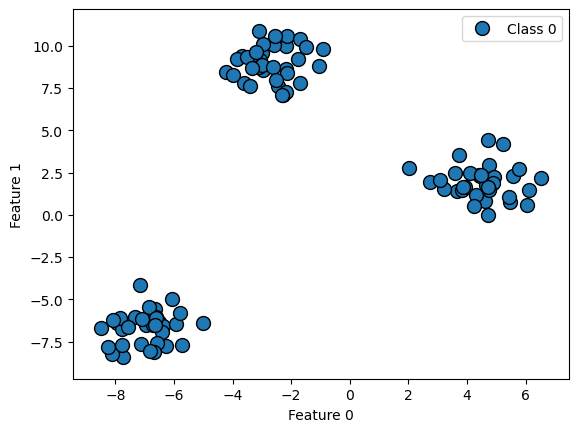

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### Now, we train a LinearSVC classifier on the dataset:


In [13]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape  (3,)


c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ con‐
tains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.


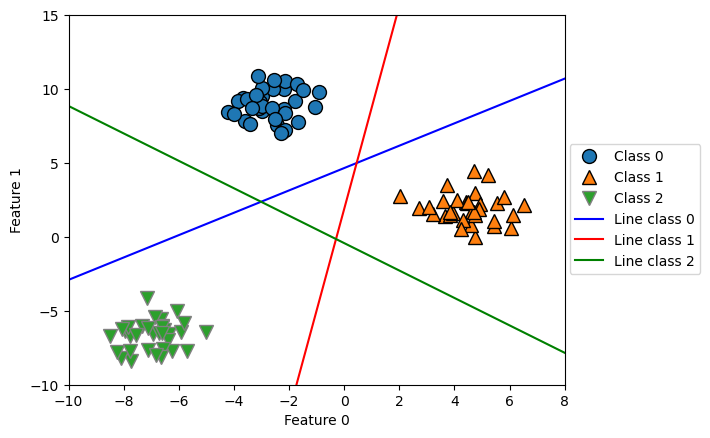

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2','Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

You can see that all the points belonging to class 0 in the training data are above the
line corresponding to class 0, which means they are on the “class 0” side of this binary
classifier. The points in class 0 are above the line corresponding to class 2, which
means they are classified as “rest” by the binary classifier for class 2. The points
belonging to class 0 are to the left of the line corresponding to class 1, which means
the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in
this area will be classified as class 0 by the final classifier (the result of the classifica‐
tion confidence formula for classifier 0 is greater than zero, while it is smaller than
zero for the other two classes).
But what about the triangle in the middle of the plot? All three binary classifiers clas‐
sify points there as “rest.” Which class would a point there be assigned to? The answer
is the one with the highest value for the classification formula: the class of the closest
line.


Text(0, 0.5, 'Feature 1')

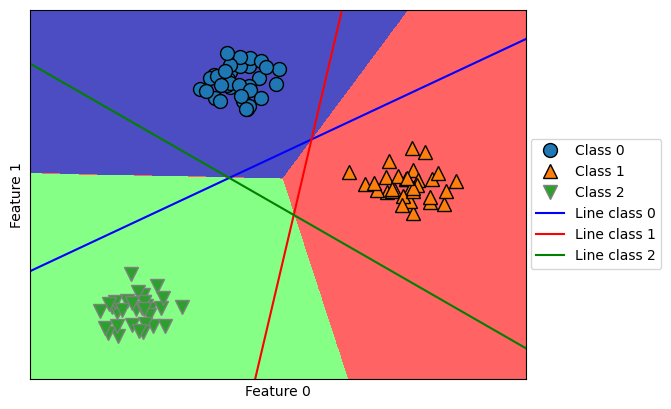

In [15]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc = (1.01, 0.3))

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
